In [1]:
# Muat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Memuat Data

In [2]:
# Muat file data menjadi DataFrame

data = pd.read_csv('/datasets/vehicles_us.csv')


### Mengeksplorasi Data Awal

Dataset yang kamu miliki berisi kolom-kolom berikut:

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)- `date_posted` — tanggal iklan ditayangkan- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus


In [3]:
# tampilkan informasi/rangkuman umum tentang DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [5]:
# tampilkan sampel data
data.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
44241,12500,2014.0,nissan maxima,excellent,6.0,gas,91079.0,automatic,sedan,blue,NaN,2019-03-03,19
9412,19990,2013.0,jeep wrangler,excellent,NaN,gas,62210.0,automatic,SUV,black,1.0,2018-05-29,10
2926,13495,2008.0,chevrolet suburban,excellent,8.0,gas,NaN,automatic,SUV,blue,1.0,2018-06-22,58
183,16950,2010.0,jeep wrangler,excellent,6.0,gas,85490.0,other,SUV,red,1.0,2018-12-26,29
7874,11999,2011.0,chevrolet colorado,excellent,4.0,gas,109941.0,automatic,truck,red,1.0,2019-02-15,5
25486,14990,2014.0,ford explorer,excellent,6.0,gas,118314.0,automatic,SUV,NaN,1.0,2018-05-02,148
37981,6995,2008.0,ford fusion,excellent,4.0,gas,95000.0,automatic,sedan,NaN,NaN,2018-09-25,36
38302,22000,2004.0,ford f-250 super duty,excellent,8.0,diesel,115000.0,automatic,truck,green,1.0,2019-02-16,62
41249,16995,2006.0,toyota 4runner,good,8.0,gas,134959.0,automatic,SUV,silver,1.0,2018-05-14,57
7928,6950,2011.0,hyundai santa fe,excellent,4.0,gas,150581.0,automatic,SUV,silver,1.0,2018-07-01,19


1. Terdapat 13 kolom dalam dataset ini, yang mencakup berbagai atribut seperti harga (price), tahun model (model_year), merek dan model kendaraan (model), kondisi (condition), jumlah silinder (cylinders), bahan bakar (fuel), jarak tempuh (odometer), jenis transmisi (transmission), tipe kendaraan (type), warna kendaraan (paint_color), apakah kendaraan memiliki penggerak 4 roda (is_4wd), tanggal iklan ditayangkan (date_posted), dan jumlah hari iklan ditayangkan (days_listed).

2. Terdapat beberapa kolom dengan nilai yang hilang, seperti model_year, cylinders, odometer, paint_color, dan is_4wd.

3. Kolom model_year, cylinders, dan odometer memiliki tipe data numerik (float) dan price & days_listed memiliki tipe data int, sedangkan kolom lainnya memiliki tipe data objek.

4. Terdapat beberapa masalah yang memerlukan penyelidikan lebih lanjut dan perubahan, seperti penanganan nilai yang hilang dan pengubahan tipe data.

In [6]:
data[['model_year', 'cylinders', 'date_posted']]

,model_year,cylinders,date_posted
0,2011.0,6.0,2018-06-23
1,NaN,6.0,2018-10-19
2,2013.0,4.0,2019-02-07
3,2003.0,8.0,2019-03-22
4,2017.0,4.0,2019-04-02
...,...,...,...
51520,2013.0,6.0,2018-10-03
51521,2002.0,4.0,2018-11-14
51522,2009.0,4.0,2018-11-15
51523,2013.0,4.0,2018-07-02


Terdapat beberapa kesalahan tipe data. seperti di kolom model_year tahun seharus nya menggunakan tipe data int. 

In [7]:
report = data.isna().sum().to_frame(name='missing_values')
report['% of total'] = (report['missing_values'] / data.shape[0] * 100).round(2)
report = report.sort_values(by='missing_values', ascending=False)
print(report)

              missing_values  % of total
is_4wd                 25953       50.37
paint_color             9267       17.99
odometer                7892       15.32
cylinders               5260       10.21
model_year              3619        7.02
price                      0        0.00
model                      0        0.00
condition                  0        0.00
fuel                       0        0.00
transmission               0        0.00
type                       0        0.00
date_posted                0        0.00
days_listed                0        0.00


Dari report tabel tersebut terdapat beberapa nilai yang hilang yaitu :
1. Pada kolom is_4wd terdapat missing vallues paling banyak yaitu sebanyak 25953 atau sebanyak 50.37.
2. Pada kolom paint_color, odometer, cylinders, model_year memiliki nilai hilang hanya sedikit yaitu di bawah 18%.
3. Pada kolom lain nya tidak di temukan missing values.

### Kesimpulan dan Langkah-Langkah Selanjutnya



Sebagian besar data masih terlihat normal, akan tetapi ada beberapa kolom yang harus ditangani agar lebih sesuai untuk analisis yang diperlukan. 
Ada Kolom yang memiliki tipe data yang tidak sesuai yaitu : 'model_year', 'cylinders', 'date_posted'.
Ada juga kolom yang meliliki nilai yang hilang yaitu pada kolom : 'is_4wd', 'paint_color', 'odometer', 'cylinders', dan 'model_year'.

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)



Memeriksa nilai-nilai yang hilang untuk setiap kolom dan menentukan apa yang harus dilakukan dengan nilai-nilai tersebut berdasarkan hipotesis:

model_year: Kolom ini berisi tahun model kendaraan. Nilai yang hilang pada kolom ini mungkin dapat diisi dengan tahun rata-rata atau median dari seluruh dataset, atau nanti bisa mencoba menggantinya berdasarkan informasi lain jika tersedia.

cylinders: Kolom ini berisi informasi tentang jumlah silinder kendaraan. Nilai yang hilang mungkin dapat diisi dengan median dari seluruh dataset.

odometer: Kolom ini berisi informasi tentang jarak tempuh kendaraan. Nilai yang hilang mungkin dapat diisi dengan median dari seluruh dataset.

paint_color: Kolom ini berisi informasi tentang warna kendaraan. Nilai yang hilang mungkin dapat diisi dengan warna yang paling umum muncul dalam dataset.

is_4wd: Kolom ini berisi informasi apakah kendaraan memiliki penggerak 4 roda. Nilai yang hilang mungkin dapat diisi dengan nilai yang paling umum muncul (misalnya, 1 untuk True).

In [8]:
# Mengatasi nilai yang hilang pada 'model_year' dengan median
median_model_year = data['model_year'].median()
data['model_year'].fillna(median_model_year, inplace=True)

In [9]:
# Mengatasi nilai yang hilang pada 'cylinders' dengan median
median_cylinders = data['cylinders'].median()
data['cylinders'].fillna(median_cylinders, inplace=True)

In [10]:
# Mengatasi nilai yang hilang pada 'odometer' dengan median
median_odometer = data['odometer'].median()
data['odometer'].fillna(median_odometer, inplace=True)

In [11]:
# Mengatasi nilai yang hilang pada 'paint_color' dengan warna yang paling umum
data['paint_color'] = data['paint_color'].fillna('unknown')

In [12]:
# Mengatasi nilai yang hilang pada 'is_4wd' dengan nilai yang paling umum
data['is_4wd'] = data['is_4wd'].fillna(0)

In [13]:
# Memeriksa apakah masih terdapat nilai yang hilang atau tidak
report = data.isna().sum().to_frame(name='missing_values')
report['% of total'] = (report['missing_values'] / data.shape[0] * 100).round(2)
report = report.sort_values(by='missing_values', ascending=False)
print(report)

              missing_values  % of total
price                      0         0.0
model_year                 0         0.0
model                      0         0.0
condition                  0         0.0
cylinders                  0         0.0
fuel                       0         0.0
odometer                   0         0.0
transmission               0         0.0
type                       0         0.0
paint_color                0         0.0
is_4wd                     0         0.0
date_posted                0         0.0
days_listed                0         0.0


## Memperbaiki Tipe Data

In [14]:
# Mengubah tipe data kolom date_posted menjadi datetime
data['date_posted'] = pd.to_datetime(data['date_posted'])

In [15]:
# Mengubah tipe data kolom days_listed, model_year, cylinders menjadi int
data['days_listed'] = data['days_listed'].astype(int)
data['model_year'] = data['model_year'].astype(int)
data['cylinders'] = data['cylinders'].astype(int)

In [16]:
# Mengubah tipe data kolom is_4wd menjadi boolean
data['is_4wd'] = data['is_4wd'].astype(bool)

In [17]:
# Mengubah tipe data kolom price dan odometer menjadi float
data['price'] = data['price'].astype(float)
data['odometer'] = data['odometer'].astype(float)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  float64       
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


## Memperbaiki Kualitas Data

In [19]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan
data['weekday_posted'] = data['date_posted'].dt.weekday
data['year_posted'] = data['date_posted'].dt.year
data['month_posted'] = data['date_posted'].dt.month

In [20]:
# Tambahkan usia kendaraan saat iklan ditayangkan
data['car_age'] = (data['year_posted'] - data['model_year']).astype(int) + 1

In [21]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
data['odo_per_year'] = data['odometer'] / data['car_age']


In [22]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,2018,6,8,18125.000000
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,2018,10,8,11088.125000
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2019,2,7,15714.285714
3,1500.0,2003,ford f-150,fair,8,gas,113000.0,automatic,pickup,unknown,False,2019-03-22,9,4,2019,3,17,6647.058824
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2019,4,3,26967.666667


In [23]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang bisa dimanipulasi lebih mudah
condition_mapping = {'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}
data['condition'] = data['condition'].map(condition_mapping)

## Memeriksa Data yang Sudah Bersih

In [24]:
# tampilkan informasi/rangkuman umum tentang DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  float64       
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  int64         
 4   cylinders       51525 non-null  int64         
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  float64       
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  bool          
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  weekday_posted  51525 non-null  int64         
 14  year_posted     51525 non-null  int64         
 15  mo

In [25]:
data.describe()

,price,model_year,condition,cylinders,odometer,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.838234,2.637535,6.112450,115162.352179,39.55476,3.005434,2018.307462,6.628491,9.469229,15537.649192
std,10040.803015,6.065836,0.712447,1.573784,59909.264385,28.20427,1.997759,0.461447,3.474134,6.079773,12341.655297
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,0.000000,2018.000000,1.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,79181.000000,19.00000,1.000000,2018.000000,3.000000,5.000000,9411.764706
50%,9000.000000,2011.000000,3.000000,6.000000,113000.000000,33.00000,3.000000,2018.000000,7.000000,8.000000,13214.444444
75%,16839.000000,2014.000000,3.000000,8.000000,146541.000000,53.00000,5.000000,2019.000000,10.000000,13.000000,18394.500000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,6.000000,2019.000000,12.000000,111.000000,373200.000000


In [26]:
# tampilkan sampel data 
data.sample(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
21713,2995.0,2000,subaru outback,2,4,gas,214000.0,automatic,wagon,green,True,2018-05-25,53,4,2018,5,19,11263.157895
30563,10499.0,2016,ford escape,3,4,gas,113000.0,automatic,SUV,white,False,2018-12-25,92,1,2018,12,3,37666.666667
12769,8975.0,2008,jeep liberty,2,6,gas,101000.0,automatic,SUV,custom,True,2018-11-02,19,4,2018,11,11,9181.818182
14891,18500.0,1966,ford mustang,4,6,gas,99977.0,automatic,coupe,white,False,2018-06-29,104,4,2018,6,53,1886.358491
38180,34995.0,2016,ram 2500,2,6,diesel,112352.0,automatic,pickup,silver,True,2018-12-07,25,4,2018,12,3,37450.666667
41810,4800.0,2012,chrysler town & country,3,6,gas,181020.0,automatic,mini-van,blue,False,2019-01-26,30,5,2019,1,8,22627.500000
46828,15000.0,2009,jeep wrangler unlimited,3,6,gas,156600.0,automatic,offroad,silver,True,2018-11-21,11,2,2018,11,10,15660.000000
39069,4395.0,2009,nissan versa,3,4,gas,131000.0,automatic,hatchback,silver,False,2018-12-20,55,3,2018,12,10,13100.000000
51392,18999.0,2014,ford f-150,2,8,gas,128204.0,automatic,truck,blue,True,2018-10-27,19,5,2018,10,5,25640.800000
34503,11800.0,2017,ford focus,3,4,gas,113000.0,automatic,sedan,unknown,False,2018-06-18,16,0,2018,6,2,56500.000000


## Mempelajari Parameter Inti 

Parameternya adalah :
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

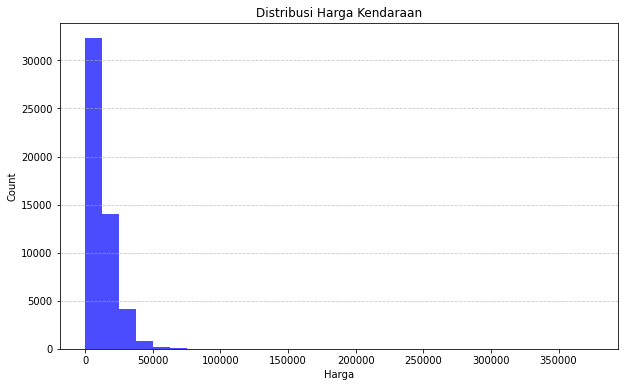

In [27]:
# Buat histogram untuk parameter harga
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=30, color='blue', alpha=0.7)
plt.title('Distribusi Harga Kendaraan')
plt.xlabel('Harga')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

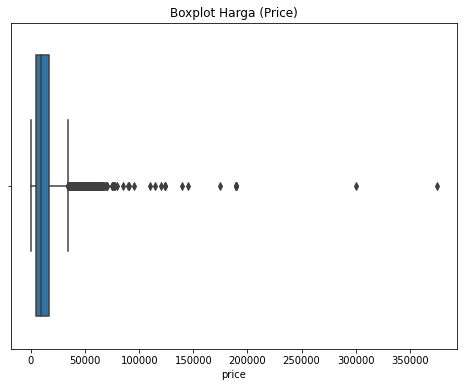

In [28]:
# Boxplot untuk kolom 'price'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['price'])
plt.title('Boxplot Harga (Price)')
plt.show()

Distribusi Harga Kendaraan pada boxplot terlihat masih banyak data outlier, nanti akan kita hilangkan data outlier pada kolom Price

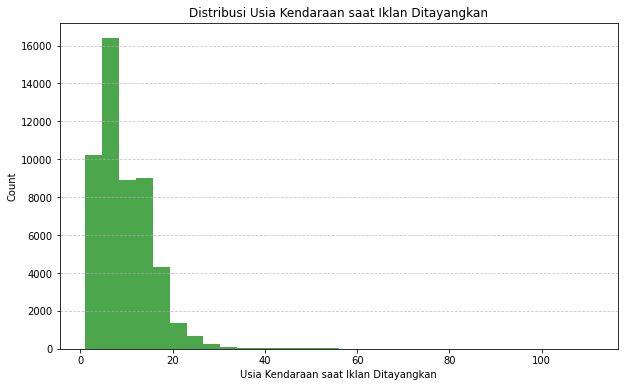

In [29]:
# Buat histogram untuk parameter usia kendaraan ketika iklan ditayangkan
plt.figure(figsize=(10, 6))
plt.hist(data['car_age'], bins=30, color='green', alpha=0.7)
plt.title('Distribusi Usia Kendaraan saat Iklan Ditayangkan')
plt.xlabel('Usia Kendaraan saat Iklan Ditayangkan')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

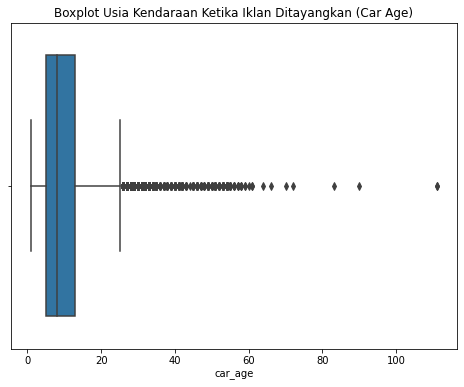

In [30]:
# Boxplot untuk kolom 'car_age'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['car_age'])
plt.title('Boxplot Usia Kendaraan Ketika Iklan Ditayangkan (Car Age)')
plt.show()

Distribusi Usia Kendaraan saat Iklan Ditayangkan dalam boxplot terlihat banyak sekali data outlier nya. Kolom Car_Age juga harus kita hilangkan Data Outlier Nya.

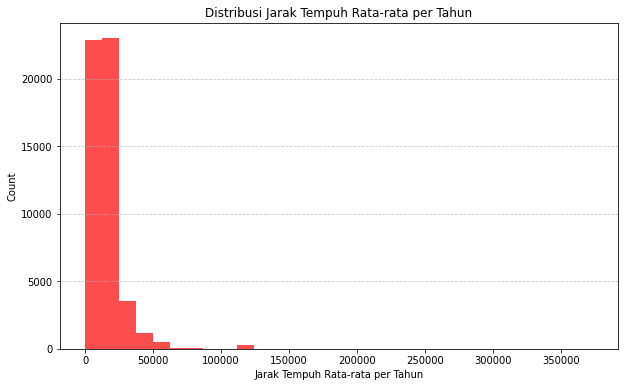

In [31]:
# Buat histogram untuk parameter jarak tempuh
plt.figure(figsize=(10, 6))
plt.hist(data['odo_per_year'], bins=30, color='red', alpha=0.7)
plt.title('Distribusi Jarak Tempuh Rata-rata per Tahun')
plt.xlabel('Jarak Tempuh Rata-rata per Tahun')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

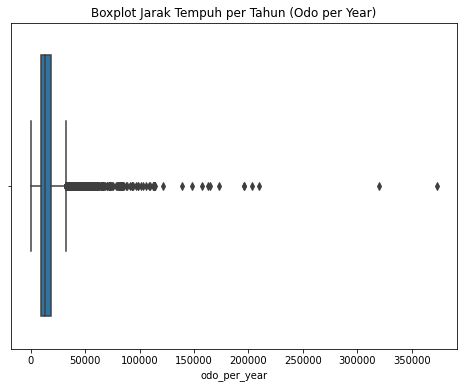

In [32]:
# Boxplot untuk kolom 'odo_per_year'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['odo_per_year'])
plt.title('Boxplot Jarak Tempuh per Tahun (Odo per Year)')
plt.show()

Terlihat masih banyak data outlier pada Distribusi Jarak Tempuh Rata-rata per Tahun. Nanti kita hilangkan juga data outlier pada kolom odo_per_year

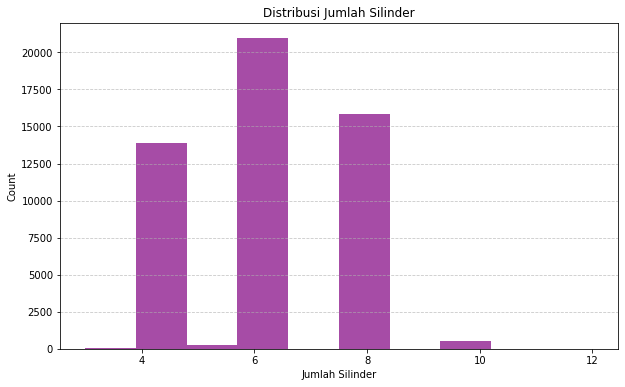

In [33]:
# Buat histogram untuk parameter jumlah silinder
plt.figure(figsize=(10, 6))
plt.hist(data['cylinders'], bins=10, color='purple', alpha=0.7)
plt.title('Distribusi Jumlah Silinder')
plt.xlabel('Jumlah Silinder')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

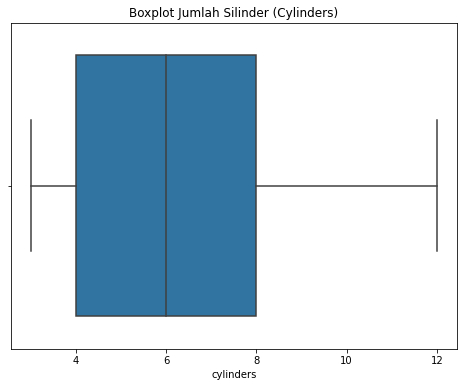

In [34]:
# Boxplot untuk kolom 'cylinders'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['cylinders'])
plt.title('Boxplot Jumlah Silinder (Cylinders)')
plt.show()

Pada Distribusi Jumlah Silinder terlihat tidak ada data outlier. Jadi untuk kolom Cylinder sudah aman.

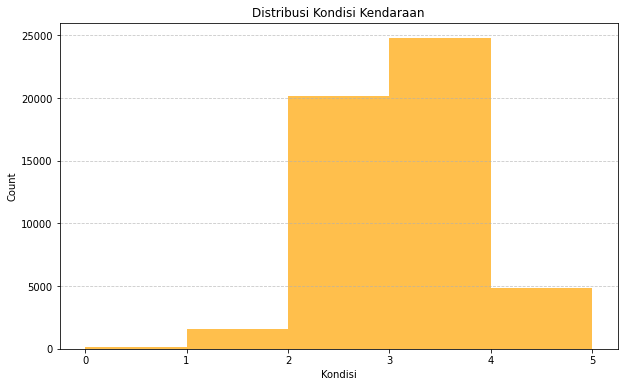

In [35]:
# Buat histogram untuk parameter kondisi
plt.figure(figsize=(10, 6))
plt.hist(data['condition'], bins=5, color='orange', alpha=0.7)
plt.title('Distribusi Kondisi Kendaraan')
plt.xlabel('Kondisi')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

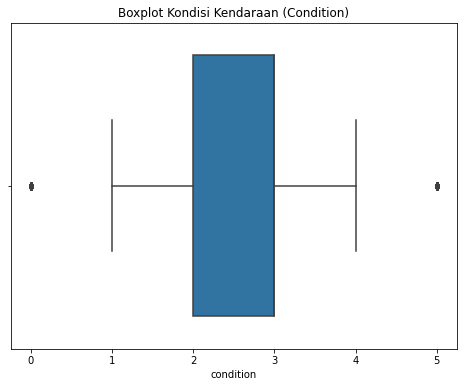

In [36]:
# Boxplot untuk kolom 'condition'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['condition'])
plt.title('Boxplot Kondisi Kendaraan (Condition)')
plt.show()

Pada Distribusi Kondisi Kendaraan terlihat sedikit outlier. perlu sedikit perbaikan.

## Mempelajari dan Menangani Outlier


Pada kolom 'condition', 'price', 'car_age', 'odo_per_year', 'cylinders' tersebut harus di bersihkan data outlier nya.
Pada kolom tersebut saya akan membuat sebuah fungsi untuk menghitung dan mengembalikan nilai lower_whisker dan upper_whisker agar lebih optimal. Dengan Fungsi ini penanganan outlier akan lebih optimal dan menjadi lebih singkat.

In [37]:
# Cell code 1: Fungsi untuk menghitung batas bawah dan atas menggunakan metode IQR
def upper_lower_whisker(series):
    Q1  = series.quantile(0.25)
    Q3  = series.quantile(0.75)

    IQR = Q3 - Q1

    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)

    return lower_whisker, upper_whisker


In [38]:
# Cell code 2: Fungsi untuk membersihkan outlier pada kolom tertentu
def outlier_cleansing(data, column):
    # Menghitung batas bawah dan atas
    lower, upper = upper_lower_whisker(data[column])
    print(f'lower values : {lower}')
    print(f'upper values : {upper}')

    # Visualisasi boxplot sebelum pembersihan outlier
    plt.title(f'Before cleaning outlier in {column} column')
    sns.boxplot(data=data, x=column)
    plt.show()

    # Membersihkan outlier
    data = data[(data[column] > lower) & (data[column] < upper)]

    # Menghitung ulang batas bawah dan atas setelah pembersihan outlier
    lower_check, upper_check = upper_lower_whisker(data[column])
    print(f'lower_check values : {lower_check}')
    print(f'upper_check values : {upper_check}')

    # Visualisasi boxplot setelah pembersihan outlier
    plt.title(f'After cleaning outlier in {column} column')
    sns.boxplot(data=data, x=column)
    plt.show()

    # Menampilkan pesan jika proses pembersihan outlier selesai
    if lower == lower_check or upper == upper_check:
        print(f'\n====== [FINISHED] outlier in [{column}] column has been cleared! ======\n')
        return data
    else:
        print(f'\n------ [RE-START] cleaning outlier in {column} column ------\n')
        # Memanggil diri sendiri untuk melakukan pembersihan outlier secara rekursif jika masih ditemukan outlier
        data = outlier_cleansing(data=data, column=column)
        return data


====== [START] cleaning outlier in condition column ====== 

lower values : 0.5
upper values : 4.5


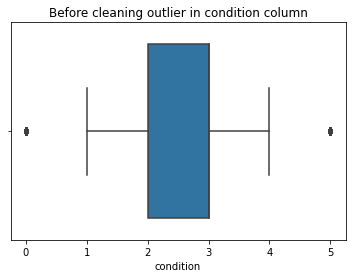

lower_check values : 0.5
upper_check values : 4.5


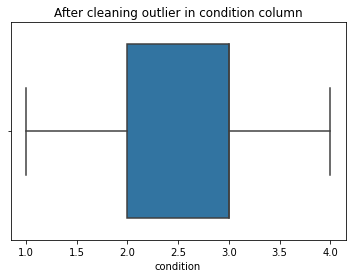


====== [FINISHED] outlier in [condition] column has been cleared! ======


====== [START] cleaning outlier in price column ====== 

lower values : -12700.0
upper values : 34500.0


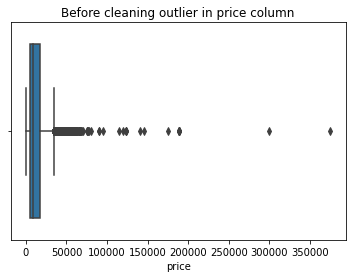

lower_check values : -11362.5
upper_check values : 32257.5


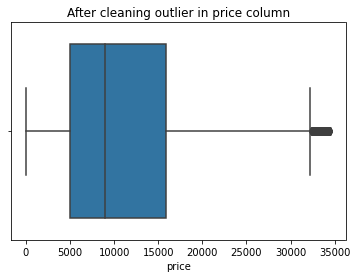


------ [RE-START] cleaning outlier in price column ------

lower values : -11362.5
upper values : 32257.5


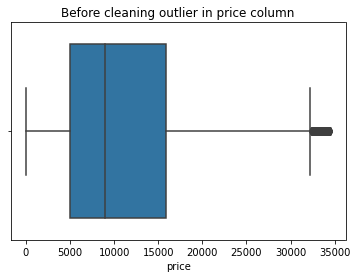

lower_check values : -10762.5
upper_check values : 31257.5


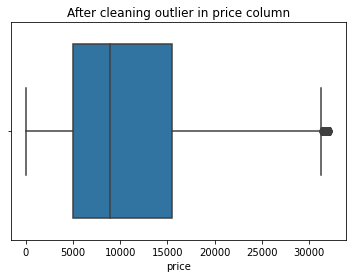


------ [RE-START] cleaning outlier in price column ------

lower values : -10762.5
upper values : 31257.5


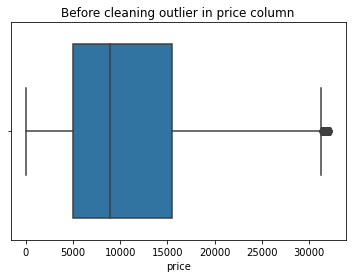

lower_check values : -10012.5
upper_check values : 30007.5


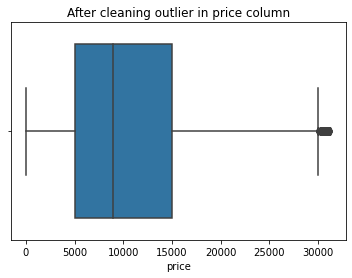


------ [RE-START] cleaning outlier in price column ------

lower values : -10012.5
upper values : 30007.5


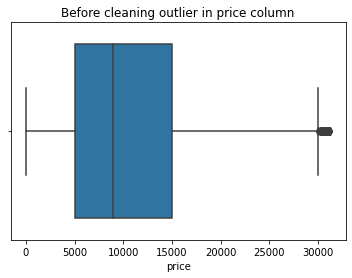

lower_check values : -10011.0
upper_check values : 30005.0


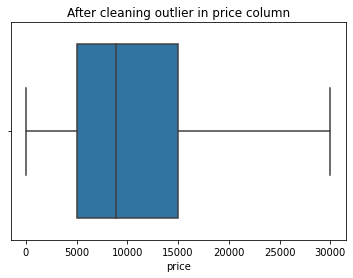


------ [RE-START] cleaning outlier in price column ------

lower values : -10011.0
upper values : 30005.0


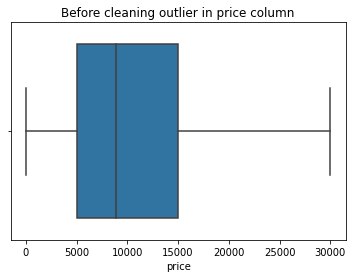

lower_check values : -10011.0
upper_check values : 30005.0


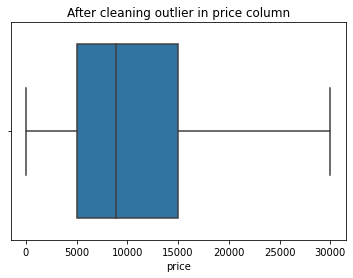


====== [FINISHED] outlier in [price] column has been cleared! ======


====== [START] cleaning outlier in car_age column ====== 

lower values : -4.5
upper values : 23.5


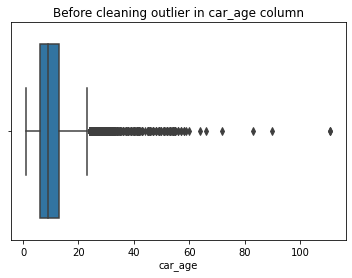

lower_check values : -4.5
upper_check values : 23.5


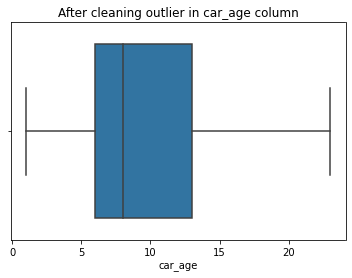


====== [FINISHED] outlier in [car_age] column has been cleared! ======


====== [START] cleaning outlier in odo_per_year column ====== 

lower values : -3560.479166666666
upper values : 31356.354166666668


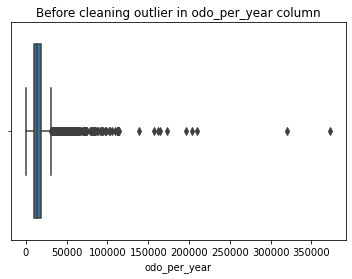

lower_check values : -2148.833333333334
upper_check values : 28692.5


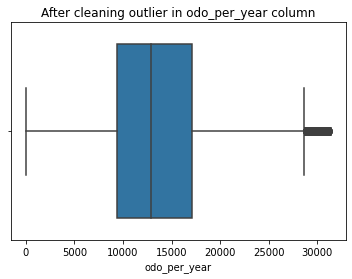


------ [RE-START] cleaning outlier in odo_per_year column ------

lower values : -2148.833333333334
upper values : 28692.5


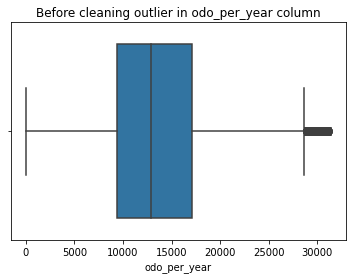

lower_check values : -1813.2187499999964
upper_check values : 28072.69791666666


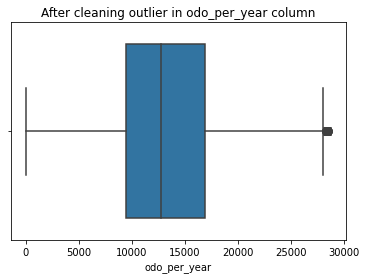


------ [RE-START] cleaning outlier in odo_per_year column ------

lower values : -1813.2187499999964
upper values : 28072.69791666666


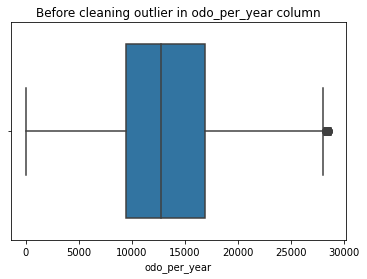

lower_check values : -1631.6163003662969
upper_check values : 27609.890415140413


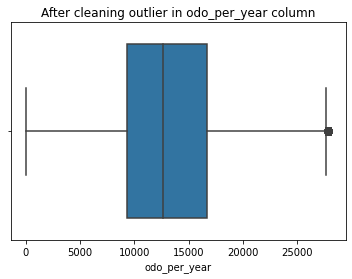


------ [RE-START] cleaning outlier in odo_per_year column ------

lower values : -1631.6163003662969
upper values : 27609.890415140413


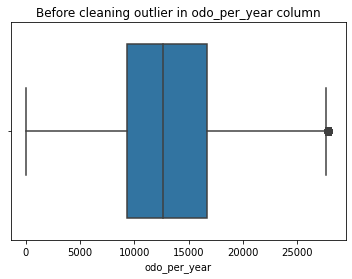

lower_check values : -1558.0791666666682
upper_check values : 27485.687500000004


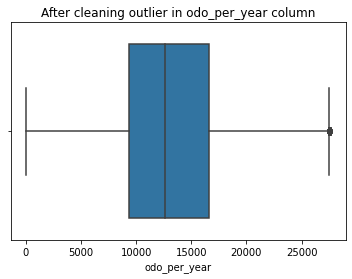


------ [RE-START] cleaning outlier in odo_per_year column ------

lower values : -1558.0791666666682
upper values : 27485.687500000004


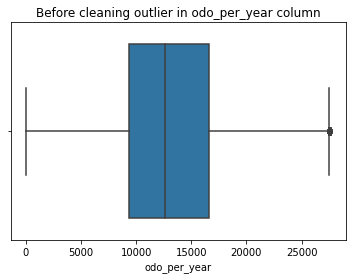

lower_check values : -1532.7685439560428
upper_check values : 27419.803983516482


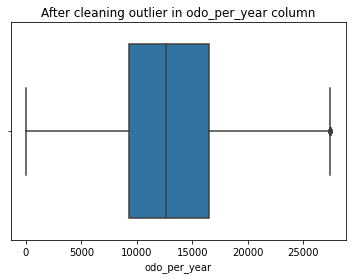


------ [RE-START] cleaning outlier in odo_per_year column ------

lower values : -1532.7685439560428
upper values : 27419.803983516482


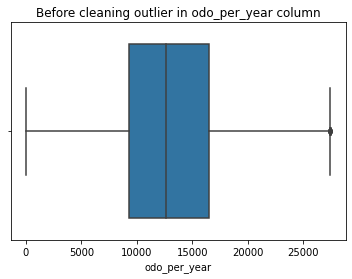

lower_check values : -1528.6093749999982
upper_check values : 27412.615625


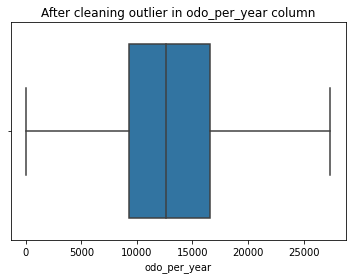


------ [RE-START] cleaning outlier in odo_per_year column ------

lower values : -1528.6093749999982
upper values : 27412.615625


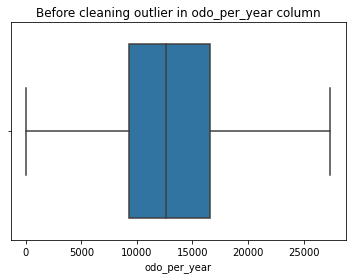

lower_check values : -1528.6093749999982
upper_check values : 27412.615625


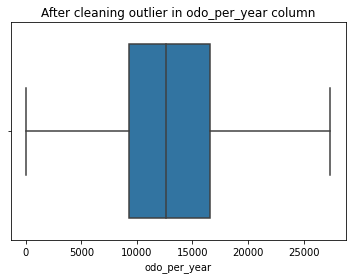


====== [FINISHED] outlier in [odo_per_year] column has been cleared! ======


====== [START] cleaning outlier in cylinders column ====== 

lower values : -2.0
upper values : 14.0


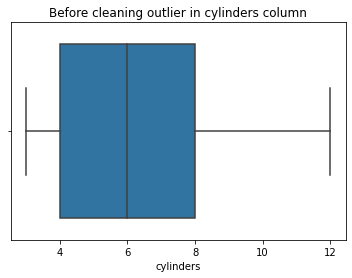

lower_check values : -2.0
upper_check values : 14.0


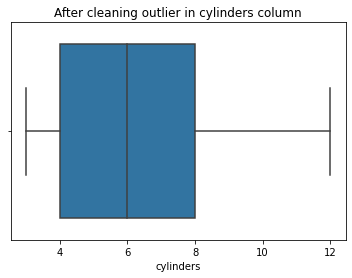


====== [FINISHED] outlier in [cylinders] column has been cleared! ======



In [39]:
# Cell code 3: Pemrosesan outlier untuk beberapa kolom tertentu
df_final = data.copy()
list_of_selected_column = ['condition', 'price', 'car_age', 'odo_per_year', 'cylinders']

# Iterasi untuk setiap kolom yang dipilih
for column in list_of_selected_column:
    print(f'\n====== [START] cleaning outlier in {column} column ====== \n')
    # Memanggil fungsi outlier_cleansing untuk membersihkan outlier pada kolom tertentu
    df_final = outlier_cleansing(data=df_final, column=column)

Berikut deskripsi temuan saya sesudah menghilangkan data outlier :
1. Pada kolom Condition untuk lower_check values : 0.5 & upper_check values : 4.5 sudah hilang outlier nya.
2. Pada kolom proce butuh beberapa kali pengulangan untuk menghilangkan data outlier nya sehingga di dapat lower_check values : -10011.0 & upper_check values : 30005.0 sampai hilang outlier nya. 
3. Pada kolom car_age lower_check values : -4.5 upper_check values : 23.5 sudah hilang outlier nya.
4. Pada kolom odo_per_year juge butuh beberapa kali pengulangan untuk menghilangkan outlier sehingga di dapat lower_check values : -1528.6093749999982 & upper_check values : 27412.615625 baru hilang outlier nya.
5. Pada kolom cylinder lower_check values : -2.0 & upper_check values : 14.0 sudah hilang outlier nya.

Jadi 5 kolom Parameter inti tersebut sekarang sudah tidak ada lagi data outlier nya.

## Mempelajari Parameter Inti Tanpa Outlier

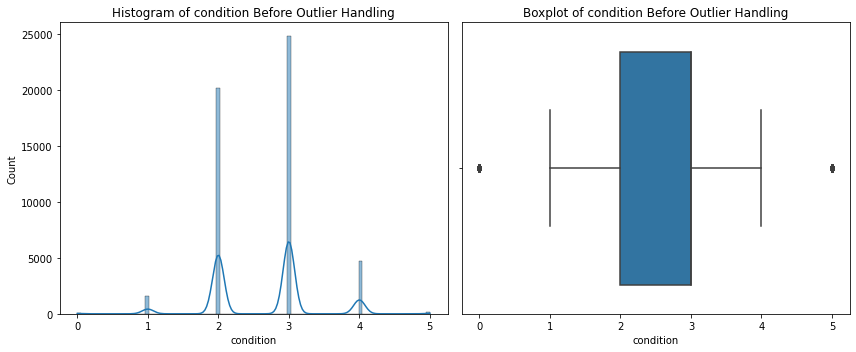

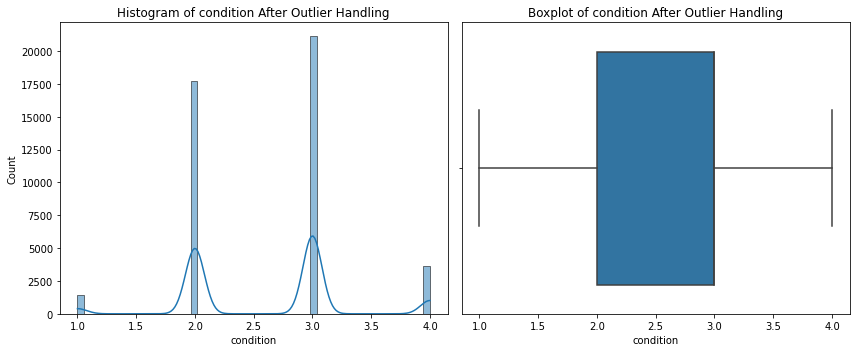

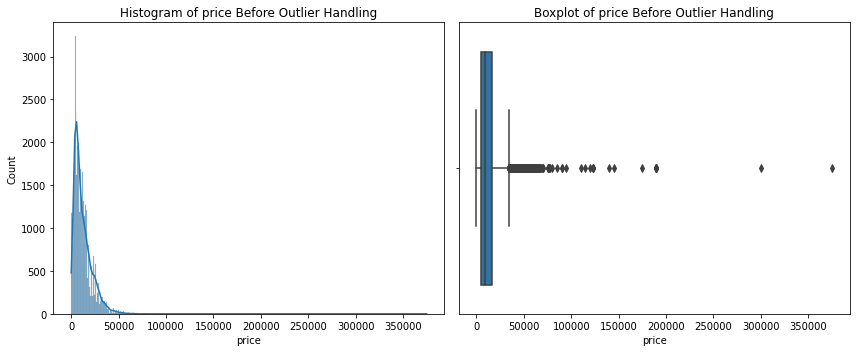

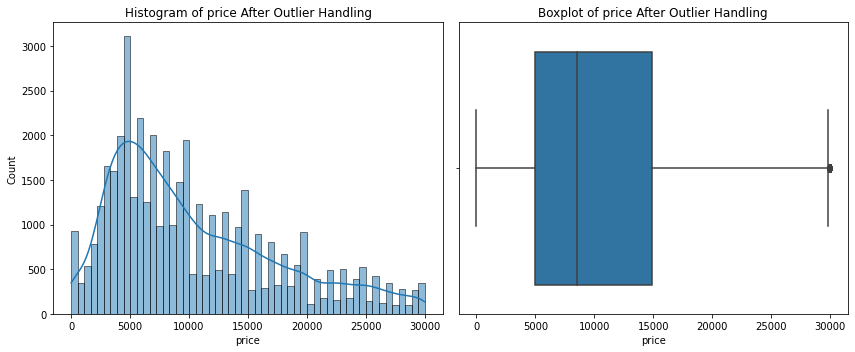

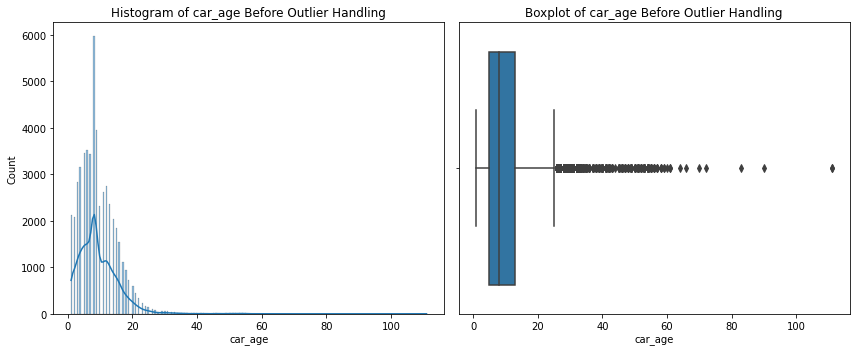

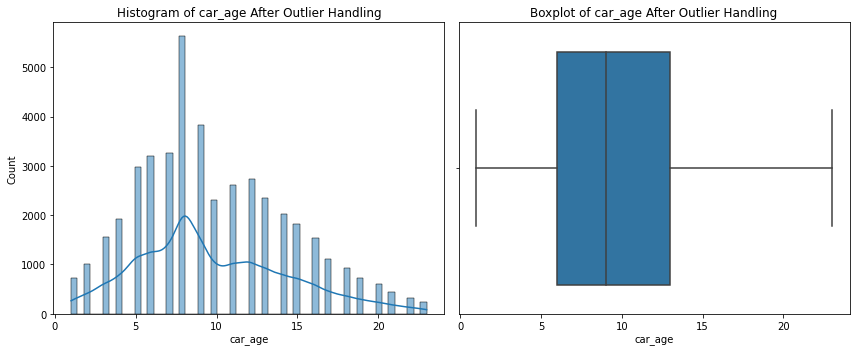

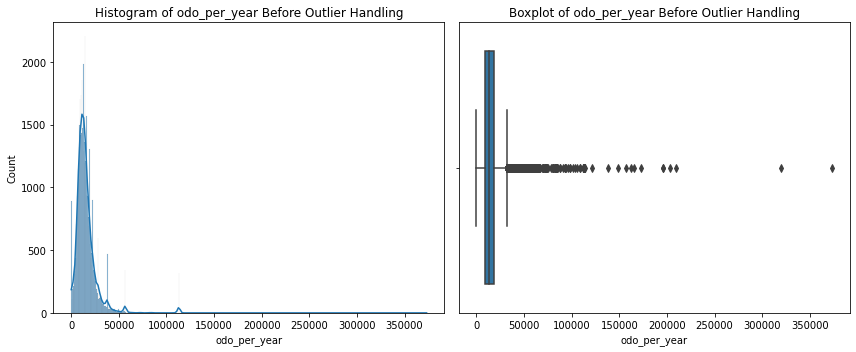

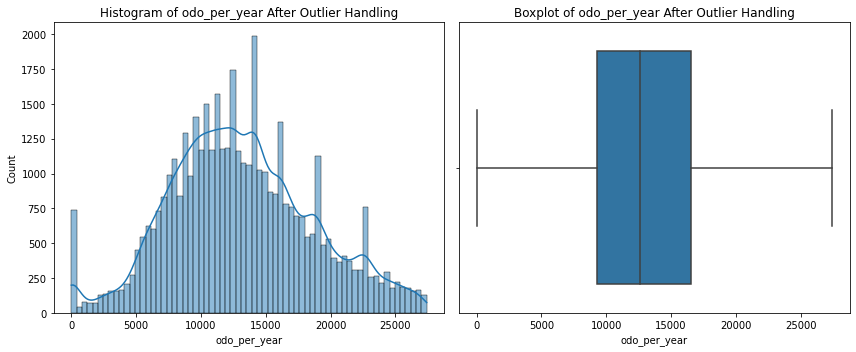

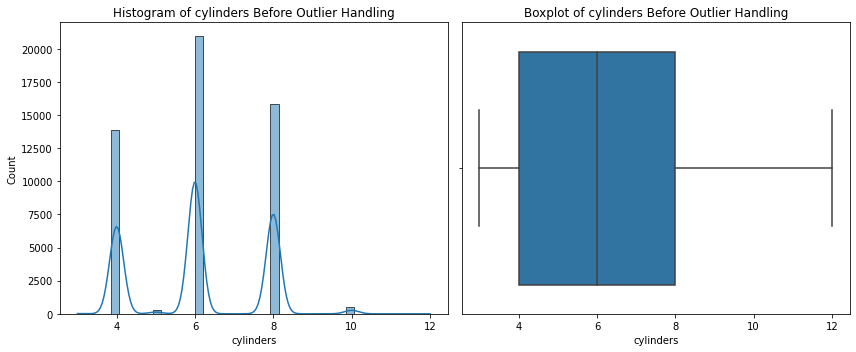

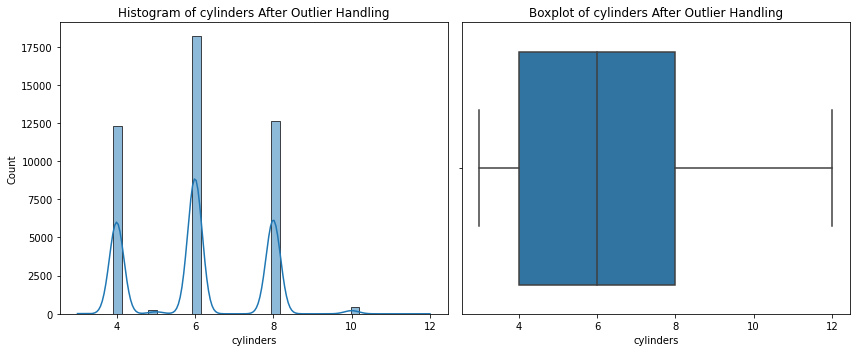

In [40]:
def plot_before_after_outlier_handling(dataframe, column):
    # Visualisasi histogram sebelum penanganan outlier
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.title(f'Histogram of {column} Before Outlier Handling')
    sns.histplot(data[column], kde=True)

    # Visualisasi boxplot sebelum penanganan outlier
    plt.subplot(1, 2, 2)
    plt.title(f'Boxplot of {column} Before Outlier Handling')
    sns.boxplot(data=data, x=column)

    plt.tight_layout()
    plt.show()

    # Visualisasi histogram setelah penanganan outlier
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.title(f'Histogram of {column} After Outlier Handling')
    sns.histplot(dataframe[column], kde=True)

    # Visualisasi boxplot setelah penanganan outlier
    plt.subplot(1, 2, 2)
    plt.title(f'Boxplot of {column} After Outlier Handling')
    sns.boxplot(data=dataframe, x=column)

    plt.tight_layout()
    plt.show()

# Iterasi untuk setiap kolom yang dipilih
for column in list_of_selected_column:
    plot_before_after_outlier_handling(dataframe=df_final, column=column)

Berikut penjelasan dari histogram dan boxplot sebelum dan sesudah proses penanganan outlier :

1. Condition Column:

Sebelum pembersihan outlier, distribusi kondisi kendaraan terlihat ada kondidi "salvage" dan "new" yang sebenernya kondisi baru dan kondisi penyelamatan itu hanya beberapa saja, untuk itu kita anggap sebagai outlier. Setelah pembersihan outlier, distribusi kondisi kendaraan menjadi lebih merata dan terfokus pada kondisi yang lebih umum yaitu pada kondisi excellent dan good, menciptakan representasi yang lebih akurat dari kondisi kendaraan di platform ini.

2. Price Column:

Sebelum pembersihan outlier, distribusi harga kendaraan sangat bervariasi, dengan sejumlah besar kendaraan pada harga yang rendah antara 0 sampai dengan 50.000 dan sejumlah kecil kendaraan pada harga yang sangat tinggi. Setelah pembersihan outlier, distribusi harga menjadi lebih merata dan terfokus yaitu di kisaran antara harga 0 sampai dengan 30.000 saja, menghilangkan nilai ekstrem yang mungkin tidak mencerminkan tren harga umum di platform.

3. Car Age Column:

Sebelum pembersihan outlier, distribusi usia kendaraan menunjukkan variasi yang signifikan, dengan beberapa kendaraan yang relatif baru dan sejumlah kendaraan tua bahkan ada yang lebih dari 100 tahun. Setelah pembersihan outlier, distribusi usia kendaraan menjadi lebih merata, menciptakan representasi yang lebih konsisten dari usia kendaraan yang ditawarkan di platform yaitu kisaran usia kendaraan baru sampai usia 25 tahun.

4. Odometer per Year Column:

Sebelum pembersihan outlier, distribusi jarak tempuh per tahun menunjukkan variasi yang signifikan, dengan beberapa kendaraan memiliki jarak tempuh yang sangat tinggi per tahun. Setelah pembersihan outlier, distribusi menjadi lebih terfokus pada kisaran jarak tempuh per tahun yang lebih umum yaitu jarak tempuh rendah hingga antara kisaran 30.000 Kilometer, menciptakan gambaran yang lebih akurat tentang tingkat pemakaian kendaraan.

5. Cylinders Column:

Tidak ada perubahan pada sebelum dan sesudah proses penanganan outlier pada kolom cylinder, karna sudah merepresentasikan jumlah silinder pada umumnya.

## Masa Berlaku Iklan 


In [41]:
# Hitung rata-rata dan median days_listed
average_days_listed = df_final['days_listed'].mean()
median_days_listed = df_final['days_listed'].median()

# Tampilkan informasi mengenai masa berlaku iklan
print(f"Rata-rata masa berlaku iklan: {average_days_listed:.2f} hari")
print(f"Median masa berlaku iklan: {median_days_listed} hari")



Rata-rata masa berlaku iklan: 39.54 hari
Median masa berlaku iklan: 33.0 hari


Masa berlaku iklan rata-rata 39.54 hari menunjukkan bahwa iklan tetap aktif selama periode tersebut sebelum dihapus atau dijual. Median masa berlaku iklan sebesar 33.0 hari menandakan bahwa sebagian besar iklan dihapus atau dijual dalam waktu kurang dari 33 hari. Informasi ini dapat membantu mengoptimalkan durasi penayangan iklan dan meningkatkan efisiensi pemasaran. Analisis lebih lanjut terhadap faktor-faktor yang memengaruhi masa berlaku iklan dapat memberikan wawasan lebih dalam untuk perbaikan strategi pemasaran dan pengalaman pengguna.

In [42]:
# Tentukan kriteria untuk iklan yang dihapus dengan cepat dan yang ditayangkan dalam waktu yang sangat lama
quick_removal_threshold = 10  # Misalnya, iklan dihapus dengan cepat jika kurang dari 10 hari
long_listing_threshold = 60  # Misalnya, iklan ditayangkan dalam waktu yang sangat lama jika lebih dari 60 hari

# Tentukan iklan yang dihapus dengan cepat
quick_removal_ads = df_final[df_final['days_listed'] < quick_removal_threshold]

# Tentukan iklan yang ditayangkan dalam waktu yang sangat lama
long_listing_ads = df_final[df_final['days_listed'] > long_listing_threshold]

# Tampilkan informasi tentang iklan yang dihapus dengan cepat dan yang ditayangkan dalam waktu yang sangat lama
print(f"\nJumlah iklan yang dihapus dengan cepat (< {quick_removal_threshold} hari): {len(quick_removal_ads)} iklan")
print(f"Jumlah iklan yang ditayangkan dalam waktu yang sangat lama (> {long_listing_threshold} hari): {len(long_listing_ads)} iklan")


Jumlah iklan yang dihapus dengan cepat (< 10 hari): 3900 iklan
Jumlah iklan yang ditayangkan dalam waktu yang sangat lama (> 60 hari): 8415 iklan


Berdasarkan data tersebut, terdapat 3,900 iklan yang dihapus dengan cepat, yaitu dalam waktu kurang dari 10 hari setelah ditayangkan. Ini mungkin menunjukkan bahwa iklan tersebut menarik perhatian pembeli potensial dengan cepat. Sedangkan terdapat 8,415 iklan yang ditayangkan dalam waktu yang sangat lama, lebih dari 60 hari. Hal ini bisa mengindikasikan bahwa iklan-iklan tersebut mengalami kesulitan menarik minat pembeli atau memiliki faktor-faktor tertentu yang membuat proses penjualan memakan waktu lebih lama. 


## Harga Rata-Rata Setiap Jenis Kendaraan

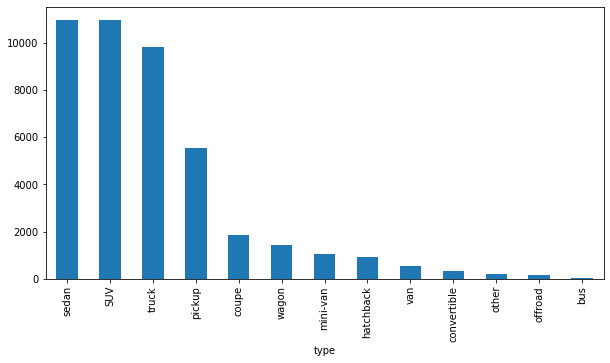

               ads    mean_price
type                            
sedan        10976   6638.087464
SUV          10972   9773.258932
truck         9820  13893.807637
pickup        5553  13578.113092
coupe         1875  13094.271467
wagon         1447   8659.360055
mini-van      1056   7516.025568
hatchback      933   6537.128617
van            527   8004.569260
convertible    313  12837.939297
other          205   9306.000000
offroad        169  13613.153846
bus             18  19959.166667


In [43]:
report = (df_final.groupby(['type'])
          .agg({'model': 'count', 'price': 'mean'})
          .rename(columns={'model': 'ads', 'price': 'mean_price'})
          .sort_values(by='ads', ascending=False))

# Menampilkan 25 data teratas
report.head(25)['ads'].plot(kind='bar', figsize=(10, 5))
plt.show()

# Menampilkan laporan
print(report.head(25))

Dua jenis kendaraan yang paling banyak muncul dalam data adalah sedan dan SUV.

1. Sedan:
Jumlah iklan (ads) untuk sedan mencapai 10,976, menjadikannya jenis kendaraan dengan presentasi iklan tertinggi.
Rata-rata harga (mean_price) untuk sedan adalah 6,638.09. Ini mengindikasikan bahwa sedan memiliki rata-rata harga yang lebih terjangkau dibandingkan jenis kendaraan lainnya.

2. SUV:
Jumlah iklan (ads) untuk SUV hampir sebanding dengan sedan, mencapai 10,972.
Rata-rata harga (mean_price) SUV lebih tinggi, yaitu sekitar 9,773.26. Hal ini menunjukkan bahwa SUV memiliki rata-rata harga yang lebih tinggi dibandingkan dengan sedan.

Dengan demikian, perusahaan dapat memahami tren popularitas dan kisaran harga untuk kedua jenis kendaraan ini. Sedan memiliki jumlah iklan yang lebih tinggi, sementara SUV cenderung memiliki harga rata-rata yang lebih tinggi.

## Faktor Harga

In [44]:
# Membuat DataFrame untuk Kendaraan Jenis SUV:
suv_data = df_final[df_final['type'] == 'SUV']

In [45]:
# Filter DataFrame untuk Variabel Kategorik:
suv_data = suv_data[suv_data['paint_color'].map(suv_data['paint_color'].value_counts()) > 50]
suv_data = suv_data[suv_data['transmission'].map(suv_data['transmission'].value_counts()) > 50]

In [46]:
# Analisis Terpisah untuk DataFrame SUV:
# Table Korelasi:
columns = ['odo_per_year', 'car_age', 'condition', 'price']
display(suv_data[columns].corr()[['price']].sort_values(by='price',
                                                       ascending = False))



,price
price,1.000000
condition,0.260131
odo_per_year,0.149964
car_age,-0.565620


Untuk Kendaraan SUV, Pada tabel Korelasi terlihat kondisi memiliki korelasi lebih tinggi dibandingkan jarak tempuh kendaraan dan usia kendaraan, ternyata Usia kendaraan lebih kecil korelasi nya dibandingkan dengan kondisi dan jarak tempuh.

In [47]:
# Table Report Jenis Transmisi:
display(suv_data.groupby('transmission').agg({'model': 'count', 'price': 'median'})
    .rename(columns={'model': 'ads', 'price': 'median_price'})
    .sort_values(by='median_price', ascending=False)
    .query('ads > 50'))

,ads,median_price
transmission,,
manual,435,10995.0
automatic,10311,7997.0
other,145,7499.0


In [48]:
# Table Report Warna Kendaraan:
display(suv_data.groupby('paint_color')
    .agg({'model': 'count', 'price': 'median'})
    .rename(columns={'model': 'ads', 'price': 'median_price'})
    .sort_values(by='median_price', ascending=False)
    .query('ads > 50'))

,ads,median_price
paint_color,,
orange,75,16900.0
black,1911,9995.0
white,1677,8995.0
unknown,1967,7999.0
grey,1032,7995.0
silver,1424,7995.0
custom,277,7898.0
red,825,7495.0
brown,346,6999.5


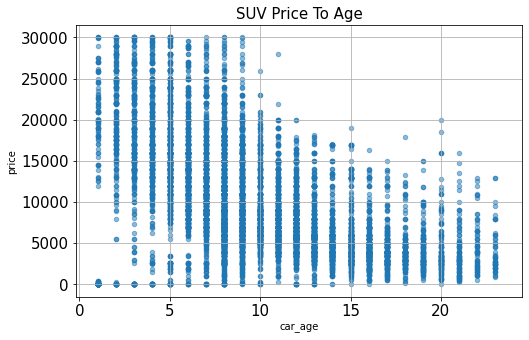

In [49]:
# Plot Harga SUV Seiring Bertambahnya Usia:
suv_data.plot(x='car_age', y='price', kind='scatter', figsize=(8,5), grid=True, fontsize=15, alpha=0.5)
plt.title('SUV Price To Age', fontsize=15)
plt.xlim(-0.2, 24.5)
plt.show()

Untuk harga kendaraan SUV berdasarkan usia kendaraan, terlihat pada tabel semakin tua usia kendaraan maka semakin rendah harga kendaraan tersebut.

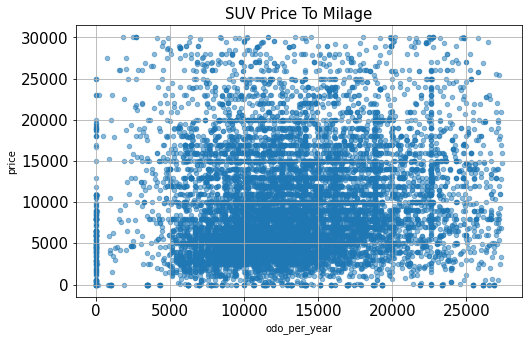

In [50]:
# Plot Harga SUV terhadap Jarak Tempuh:
suv_data.plot(x='odo_per_year', y='price', kind='scatter', figsize=(8,5), grid=True, fontsize=15, alpha=0.5)
plt.title('SUV Price To Milage', fontsize=15)
plt.show()

Untuk harga kendaraan SUV berdasarkan jarak tempuh, terlihat abstrak titik titik pada tabel akan tetapi benyak tersebar di 5.000 sampai dengan 20.000 artinya jarak tempuh yang tidak terlalu tinggi lebih banyak peminat nya.

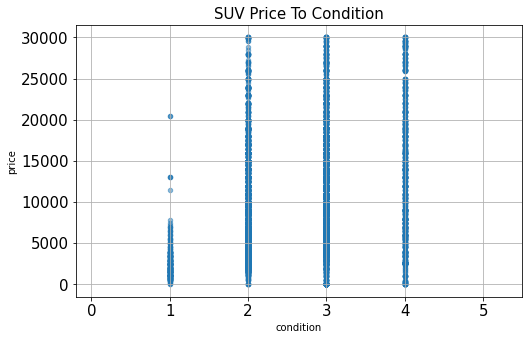

In [51]:
# Plot Harga SUV Berdasarkan Kondisi:
suv_data.plot(x='condition', y='price', kind='scatter', figsize=(8,5), grid=True, fontsize=15, alpha=0.5)
plt.title('SUV Price To Condition', fontsize=15)
plt.xlim(-0.2, 5.5)
plt.show()

Untuk harga kendaraan SUV berdasarkan kondisi kendaraan, semakin baik kondisi kendaraan maka semakin tinggi pula harga nya.

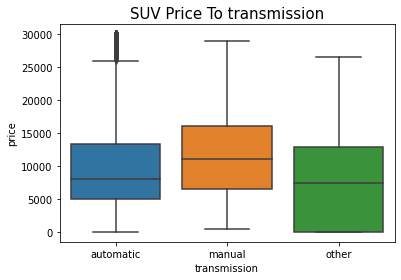

In [52]:
# Plot Harga SUV terhadap Transmission:
sns.boxplot(x='transmission', y='price', data=suv_data)
plt.title('SUV Price To transmission', fontsize=15)
plt.show()

Untuk harga kendaraan SUV berdasarkan transmisi, transmisi other terlihat harga merata di kisaran harga ter rendah hingga harga 14.000 an, transmiai manual terlihat harga merata di kisaran harga 7.000 an hingga 16.000 an kemudian pada transmisi automatic harga merata di 5.000 an hingga 14.000 an. Akan tetapi pada transmisi automatic terlihat melebihi batas Maximum harga automatic.

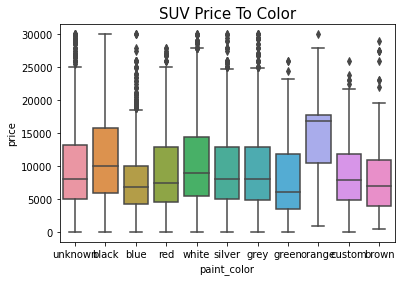

In [53]:
# Plot Harga SUV Berdasarkan Paint Color:
sns.boxplot(x='paint_color', y='price', data=suv_data)
plt.title('SUV Price To Color', fontsize=15)
plt.show()

Untuk harga kendaraan SUV berdasarkan Warna kendaraan, sepertinya warna hitam lebih unggul berdasarkan harga dibandingkan warna lain.

Kesimpulan Sementara Kendaraan SUV:

Berdasarkan hasil analisis, dapat disimpulkan bahwa harga kendaraan SUV sangat dipengaruhi oleh beberapa faktor. Korelasi tertinggi dengan harga adalah kondisi kendaraan, yang menunjukkan bahwa semakin bagus kendaraan, semakin tinggi harga jualnya. Jarak tempuh per tahun kendaraan juga memainkan peran penting dalam menentukan harga dan usia kendaraan terlihat lebih rendah korelasinya terhadap harga kendaraan. Jenis transmisi dan Warna kendaraan juga memberikan pengaruh, dengan beberapa perbedaan yang terlihat di antara kategori-kategori tersebut.

Untuk mendapatkan pemahaman yang lebih komprehensif, perbandingan antara kendaraan tipe SUV dan sedan juga perlu dianalisis. Data ini dapat memberikan wawasan lebih lanjut tentang preferensi dan tren pembeli untuk masing-masing jenis kendaraan.

In [54]:
# Membuat DataFrame untuk Kendaraan Jenis Sedan:
sedan_data = df_final[df_final['type'] == 'sedan']

In [55]:
# Filter DataFrame untuk Variabel Kategorik:
sedan_data = sedan_data[sedan_data['paint_color'].map(sedan_data['paint_color'].value_counts()) > 50]
sedan_data = sedan_data[sedan_data['transmission'].map(sedan_data['transmission'].value_counts()) > 50]

In [56]:
# Analisis Terpisah untuk DataFrame Sedan:
# Table Korelasi:
columns = ['odo_per_year', 'car_age', 'condition', 'price']
display(sedan_data[columns].corr()[['price']].sort_values(by='price',
                                                       ascending = False))

,price
price,1.000000
condition,0.294197
odo_per_year,0.075845
car_age,-0.618182


Untuk Kendaraan Sedan, Terlihat tidak jauh berbeda dengan kendaraan SUV, Pada tabel Korelasi terlihat kondisi memiliki korelasi lebih tinggi dibandingkan jarak tempuh kendaraan dan usia kendaraan, Untuk Usia kendaraan juga memiliki korelasi lebih kecil  dibandingkan dengan kondisi dan jarak tempuh.

In [57]:
# Table Report Jenis Transmisi:
display(sedan_data.groupby('transmission').agg({'model': 'count', 'price': 'median'})
    .rename(columns={'model': 'ads', 'price': 'median_price'})
    .sort_values(by='median_price', ascending=False)
    .query('ads > 50'))

,ads,median_price
transmission,,
automatic,10265,5995.0
manual,547,4500.0
other,108,3995.0


In [58]:
# Table Report Warna Kendaraan:
display(sedan_data.groupby('paint_color')
    .agg({'model': 'count', 'price': 'median'})
    .rename(columns={'model': 'ads', 'price': 'median_price'})
    .sort_values(by='median_price', ascending=False)
    .query('ads > 50'))

,ads,median_price
paint_color,,
black,1573,6500.0
white,1334,6495.0
grey,1470,5995.0
red,873,5900.0
unknown,1971,5900.0
silver,1856,5707.0
blue,1144,5500.0
custom,262,5200.0
brown,242,4225.0


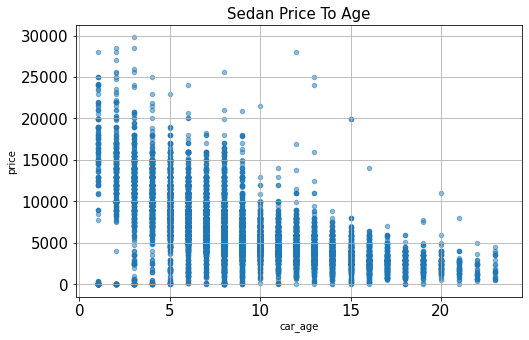

In [59]:
# Plot Harga sedan Seiring Bertambahnya Usia:
sedan_data.plot(x='car_age', y='price', kind='scatter', figsize=(8,5), grid=True, fontsize=15, alpha=0.5)
plt.title('Sedan Price To Age', fontsize=15)
plt.xlim(-0.2, 24.5)
plt.show()

Untuk harga kendaraan Sedan berdasarkan usia kendaraan, Terlihat diagram nya sedikit berbeda di bandingkan dengan kendaraan SUV, akan tetapi inti nya sama yaitu semakin tua usia kendaraan maka semakin rendah harga kendaraan tersebut. Terlihat juga harga kendaraan sedan lebih rendah dibandingkan SUV.

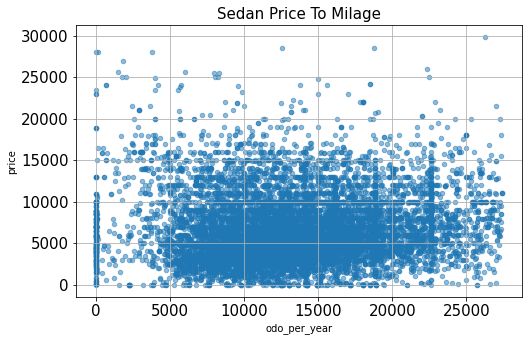

In [60]:
# Plot Harga sedan terhadap Jarak Tempuh:
sedan_data.plot(x='odo_per_year', y='price', kind='scatter', figsize=(8,5), grid=True, fontsize=15, alpha=0.5)
plt.title('Sedan Price To Milage', fontsize=15)
plt.show()

Untuk harga kendaraan Sedan berdasarkan jarak tempuh, terlihat abstrak titik titik pada tabel akan tetapi benyak tersebar di 5.000 sampai dengan 20.000 artinya jarak tempuh yang tidak terlalu tinggi lebih banyak peminat nya. Hampir sama dengan kendaraan SUV diagram nya terlihat sedikit berbeda. Terlihat juga harga kendaraan sedan lebih rendah dibandingkan SUV.

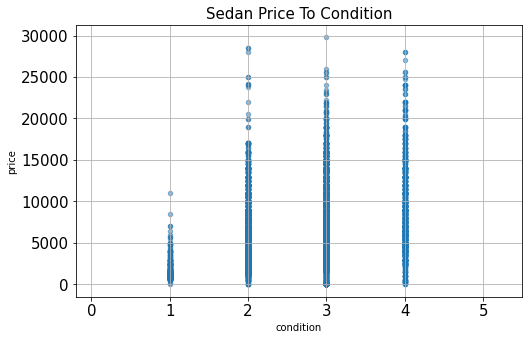

In [61]:
# Plot Harga sedan Berdasarkan Kondisi:
sedan_data.plot(x='condition', y='price', kind='scatter', figsize=(8,5), grid=True, fontsize=15, alpha=0.5)
plt.title('Sedan Price To Condition', fontsize=15)
plt.xlim(-0.2, 5.5)
plt.show()

Untuk harga kendaraan Sedan berdasarkan kondisi kendaraan, pada tabel ini terlihat lebih jelas bahwa semakin baik kondisi kendaraan maka semakin tinggi pula harga nya. Terlihat juga harga kendaraan sedan lebih rendah dibandingkan SUV.

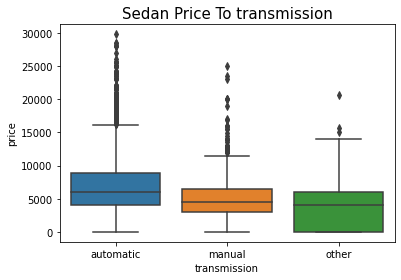

In [62]:
# Plot Harga dedan terhadap Transmission:
sns.boxplot(x='transmission', y='price', data=sedan_data)
plt.title('Sedan Price To transmission', fontsize=15)
plt.show()

Untuk harga kendaraan Sedan berdasarkan transmisi, transmisi other terlihat harga merata di kisaran harga ter rendah hingga harga 5.000 an, transmiai manual terlihat harga merata di kisaran harga 4.000 an hingga 7.000 an kemudian pada transmisi automatic harga merata di 4.500 an hingga 9.000 an. Terlihat sangat berbeda dengan kendaraan SUV. Terlihat juga harga kendaraan sedan lebih rendah dibandingkan SUV.

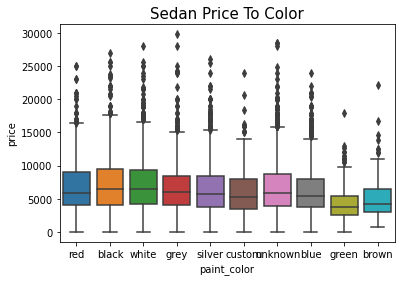

In [63]:
# Plot Harga sedan Berdasarkan Paint Color:
sns.boxplot(x='paint_color', y='price', data=sedan_data)
plt.title('Sedan Price To Color', fontsize=15)
plt.show()

Untuk harga kendaraan Sedan berdasarkan Warna kendaraan, terlihat berbeda dengan kendaraan SUV akantetapi tetap warna hitam lebih unggul berdasarkan harga dibandingkan warna lain. Terlihat juga harga kendaraan sedan lebih rendah dibandingkan SUV.

Kesimpulan Sementara Kendaraan Sedan:

Berdasarkan hasil analisis dari kedua jenis kendaraan SUV dan Sedan terlihat tidak terlalu jauh berbeda, harga kendaraan Sedan sangat dipengaruhi oleh beberapa faktor. Korelasi tertinggi dengan harga adalah kondisi kendaraan, yang menunjukkan bahwa semakin bagus kendaraan, semakin tinggi harga jualnya. Jarak tempuh per tahun kendaraan juga memainkan peran penting dalam menentukan harga dan usia kendaraan terlihat lebih rendah korelasinya terhadap harga kendaraan. Jenis transmisi dan Warna kendaraan juga memberikan pengaruh, dengan beberapa perbedaan yang terlihat di antara kategori-kategori tersebut. Akantetapi Terlihat juga harga kendaraan sedan lebih rendah dibandingkan SUV.


## Kesimpulan Umum





1. Eksplorasi Data Awal:

Terdapat 13 kolom dengan berbagai atribut kendaraan.
Beberapa kolom mengandung nilai yang hilang, seperti model_year, cylinders, odometer, paint_color, dan is_4wd.
Tipe data kolom model_year, cylinders, dan odometer adalah numerik, sedangkan yang lainnya objek.
Beberapa masalah tipe data perlu ditangani, seperti kolom model_year seharusnya bertipe int.

2. Penanganan Nilai Hilang:

Nilai hilang diisi berdasarkan hipotesis dan kebijakan tertentu. Contohnya, is_4wd diisi dengan 0, paint_color dengan 'unknown', dan nilai lainnya dengan median atau modus.

3. Perbaikan Tipe Data:

Tipe data kolom disesuaikan, seperti date_posted menjadi datetime dan lainnya disesuaikan dengan sifat datanya.

4. Mempelajari Parameter Inti:

Dilakukan pembersihan outlier pada kolom tertentu seperti condition, price, car_age, odo_per_year, dan cylinders.
Distribusi harga kendaraan dan usia kendaraan setelah pembersihan menunjukkan representasi yang lebih akurat.

5. Masa Berlaku Iklan:

Masa berlaku iklan rata-rata adalah 39.54 hari, dengan sebagian besar iklan dihapus atau dijual dalam waktu kurang dari 33 hari.
Analisis lebih lanjut dapat membantu optimalisasi durasi penayangan iklan.

6. Harga Rata-Rata Setiap Jenis Kendaraan:

Sedan memiliki jumlah iklan tertinggi, dengan rata-rata harga lebih terjangkau dibandingkan SUV.
SUV memiliki rata-rata harga lebih tinggi dibandingkan sedan.

7. Faktor Harga (SUV):

Korelasi kondisi, jarak tempuh, dan transmisi terhadap harga dianalisis.
Kesimpulan sementara menunjukkan bahwa kondisi kendaraan memiliki dampak besar, begitu juga dengan jarak tempuh dan warna.

8. Faktor Harga (Sedan):

Analisis serupa dilakukan untuk sedan, menunjukkan bahwa faktor-faktor yang mempengaruhi harga relatif sama dengan SUV.

9. Kesimpulan Akhir:

Kendaraan SUV dan Sedan memiliki korelasi yang hampir sama terhadap harga, terutama melalui kondisi, jarak tempuh, dan transmisi.
Sedan cenderung memiliki harga rata-rata yang lebih rendah dibandingkan SUV.
Analisis ini memberikan wawasan tentang tren dan preferensi pembeli, dapat membantu perusahaan dalam strategi pemasaran dan pengalaman pengguna.
